# Stack Overflow 2023 Developer Survey Analysis

This notebook shows an analysis of the 2023 Survey from Stack Overflow that was answered by more than 90,000 developers. They had to answer more than 80 questions regarding their Employment Status, Education Level, Knowledge, Platforms they've worked, between others.

The following questions will be answered through the data analysis:

    1 - Which Programming/Scripting Languages are professionals interested in a near future?
    2 - Are users using AI tools? Are users favorable on using them?
    3 - Is the YearsCode group relevant when analyzing the sentiment of using AI?

## Data Understanding

The data used in this analysis was Stack Overflow’s developer survey data from 2023. Almost 90,000 response of 84 different questions were recorded to verify demographics, opinions and expertise of different users.


## Data Gathering

Importing libraries and csv file

In [107]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline

In [129]:
# Importing csv file, which was downloaded from https://insights.stackoverflow.com/survey

df = pd.read_csv('survey_results_public.csv')
df.head()

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0
3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000.0
4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,Appropriate in length,Neither easy nor difficult,23456.0


## Assessing the Data

To go through the data analysis, first some descriptive statistics for us to understand how to answer our questions. 

In [130]:
# Checking data types and name of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89184 entries, 0 to 89183
Data columns (total 84 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ResponseId                           89184 non-null  int64  
 1   Q120                                 89184 non-null  object 
 2   MainBranch                           89184 non-null  object 
 3   Age                                  89184 non-null  object 
 4   Employment                           87898 non-null  object 
 5   RemoteWork                           73810 non-null  object 
 6   CodingActivities                     73764 non-null  object 
 7   EdLevel                              87973 non-null  object 
 8   LearnCode                            87663 non-null  object 
 9   LearnCodeOnline                      70084 non-null  object 
 10  LearnCodeCoursesCert                 37076 non-null  object 
 11  YearsCode                   

In [131]:
df.describe()

,ResponseId,CompTotal,WorkExp,ConvertedCompYearly
count,89184.000000,4.822500e+04,43579.000000,4.801900e+04
mean,44592.500000,1.036807e+42,11.405126,1.031101e+05
std,25745.347541,2.276847e+44,9.051989,6.814188e+05
min,1.000000,0.000000e+00,0.000000,1.000000e+00
25%,22296.750000,6.300000e+04,5.000000,4.390700e+04
50%,44592.500000,1.150000e+05,9.000000,7.496300e+04
75%,66888.250000,2.300000e+05,16.000000,1.216410e+05
max,89184.000000,5.000000e+46,50.000000,7.435143e+07


In [132]:
df.shape

(89184, 84)

In [133]:
# Verifying null values
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df.isnull().sum()

ResponseId                                 0
Q120                                       0
MainBranch                                 0
Age                                        0
Employment                              1286
RemoteWork                             15374
CodingActivities                       15420
EdLevel                                 1211
LearnCode                               1521
LearnCodeOnline                        19100
LearnCodeCoursesCert                   52108
YearsCode                               1749
YearsCodePro                           23048
DevType                                12312
OrgSize                                24141
PurchaseInfluence                      24220
TechList                               28333
BuyNewTool                              6175
Country                                 1211
Currency                               23850
CompTotal                              40959
LanguageHaveWorkedWith                  2044
LanguageWa

In [134]:
# Seting back max number of rows and columns
pd.reset_option('display.max_columns')
pd.reset_option('display.max_rows')

With the results above, this author decided to use the following columns to get the answers to the 3 questions:

* YearsCode
* LanguageWantToWorkWith
* AISelect
* AISent

Data will be prepared through the analysis to get the required format of for the analysis.

### Question 1: Which Programming/Scripting Languages are professionals interested in a near future?

To answer the 1st question, we will verify a question from the survey regarding the use of future programming or scripting languages to answer he question: what kind of programming language are developers interested in?

In [135]:
df2 = pd.read_csv('survey_results_schema.csv')
list(df2[df2.qid == 'QID233']['question'])

['Which <b>programming, scripting, and markup languages</b> have you done extensive development work in over the past year, and which do you want to work in over the next year? (If you both worked with the language and want to continue to do so, please check both boxes in that row.)']

In [136]:
# Verifying the top 10 results
languages = df['LanguageWantToWorkWith'].value_counts().reset_index()

# Renaming headers
languages.rename(columns={'index': 'LanguageToWork', 'LanguageWantToWorkWith': 'Count'}, inplace=True)

languages.head(10)

,LanguageToWork,Count
0,Rust,1438
1,Python,1182
2,HTML/CSS;JavaScript;TypeScript,1071
3,C#,736
4,Go,618
5,TypeScript,493
6,JavaScript;TypeScript,451
7,Java,450
8,Python;Rust,446
9,Python;SQL,424


In [137]:
# Getting some of the responses and creating a function to ungroup them
some_vals = ["Rust", "Python", "HTML/CSS", "JavaScript", "TypeScript", "C#", "Go", "SQL"]

def total_count(df, col1, col2, look_for):
    new_df = {val: 0 for val in look_for}  # Initializing new_df with 0 counts for each value
    for val in look_for:
        for idx in range(df.shape[0]):
            if val in df[col1][idx]:
                new_df[val] += int(df[col2][idx])                   
    new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
    new_df.columns = [col1, col2]
    new_df.sort_values('Count', ascending=False, inplace=True)
    return new_df


In [138]:
# Results after ungrouping data
languages_df = total_count(languages, 'LanguageToWork', 'Count', some_vals)
languages_df

,LanguageToWork,Count
3,JavaScript,34986
1,Python,34715
4,TypeScript,32256
2,HTML/CSS,29928
7,SQL,29598
0,Rust,26710
5,C#,18593
6,Go,17993


After ungrouping the results, no surprises to find JavaScript and Python on top of it. But interestingly enough, the results show 3 languages that were initially introduced around 10 years ago: Typescript, Rust and Go.

### Question 2: Are users using AI tools? Are users favorable on using them?

To find our answer, we will start by verifying the proportion of people using and favorable of the use of AI.

In [139]:
# Proportion of 
df['AISelect'].value_counts()/(df.shape[0] - sum(df['AISelect'].isnull()))

Yes                        0.443795
No, and I don't plan to    0.298057
No, but I plan to soon     0.258147
Name: AISelect, dtype: float64

In [140]:
df['AISent'].value_counts()/(df.shape[0] - sum(df['AISent'].isnull()))

Favorable           0.485569
Very favorable      0.277231
Indifferent         0.164989
Unsure              0.040178
Unfavorable         0.027609
Very unfavorable    0.004423
Name: AISent, dtype: float64

By Analyzing the proportion above, the majority of responses show that people use AI at work or plan to use soon (70%+) and are also favorable to the use of it (75%+).

### Question 3: Is the YearsCode group relevant when analyzing the sentiment of using AI?

Now let's go a little further and verify which group of users by years of coding are more favorable to the use of AI.

In [141]:
# Verifying proportion of values of YearsCode column
df['YearsCode'].value_counts()/(df.shape[0] - sum(df['YearsCode'].isnull()))

10                    0.074581
5                     0.061932
6                     0.055962
8                     0.055801
7                     0.054898
4                     0.051078
15                    0.049591
3                     0.048825
20                    0.045988
12                    0.039698
9                     0.035798
2                     0.032321
25                    0.030709
13                    0.029748
11                    0.028810
14                    0.026054
30                    0.023766
16                    0.021067
18                    0.019329
17                    0.017659
23                    0.015177
40                    0.014891
1                     0.014800
22                    0.013839
35                    0.012787
Less than 1 year      0.011071
24                    0.010968
19                    0.009447
21                    0.008704
28                    0.008178
27                    0.008120
26                    0.008075
33      

By verifying the proportion, we can see that the years that users spent coding are really spread. 

To create a more insightfull analysis, we will group the ages in 4 categories: '5 or less', '5-10', '10-20' and '30+'.
Also, as the responses 'More than 50 years' and 'Less than 1 year' are not a big portion of the data, we will drop these values.
NaN values will filled with 0, as they don't represent a significant portion of the data for this column (1,749 out of 89k).

C:\Users\karlh\AppData\Local\Temp/ipykernel_21128/1571819806.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ai['YearsCode'] = df_ai['YearsCode'].astype(int)
C:\Users\karlh\AppData\Local\Temp/ipykernel_21128/1571819806.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ai['YearsRange'] = pd.cut(df_ai['YearsCode'], bins=[0, 5, 10, 20, float('inf')],


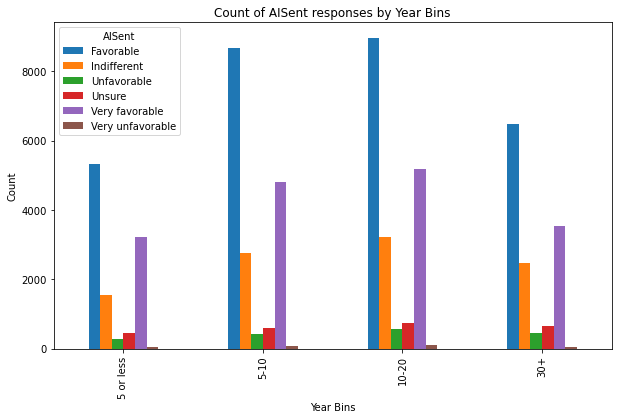

In [142]:
# Creating copy of data
df_ai = df.copy()
df_ai = df['YearsCode'].fillna(0, inplace=True) # Dropping NaNs
df_ai = df['YearsCode'].isnull().sum()
df_ai = df[~df['YearsCode'].isin(['Less than 1 year', 'More than 50 years'])] # Dropping values with these 2 strings
df_ai['YearsCode'] = df_ai['YearsCode'].astype(int)


# Creating a new column "YearsRange"
df_ai['YearsRange'] = pd.cut(df_ai['YearsCode'], bins=[0, 5, 10, 20, float('inf')], 
                          labels=['5 or less', '5-10', '10-20', '30+'], right=False)

# Grouping by 'YearsRange' and 'AISent' and calculating count
result = df_ai.groupby(['YearsRange', 'AISent']).size().unstack()

# Bar chart plot
result.plot(kind='bar', figsize=(10, 6))
plt.title('Count of AISent responses by Year Bins')
plt.xlabel('Year Bins')
plt.ylabel('Count')
plt.legend(title='AISent')
plt.show()

We can verify that users with Years of Coding from the 5-10 and 10-20 groups are the most favorable ones regarding the use of AI.

But also, users that are not very favorable to the use of AI are within the same group.

So we can conclude that the Years spent coding is not relevant when analyzing the sentiment on the use of AI.